<a href="https://colab.research.google.com/github/Shemjak/Polishuk_Denis_Vladyslavovich/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**


1. Загрузить, посмотреть, определить количество строк и объединить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.
2. Определить типы и статистики колонок.
3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.
4. Определить количество игроков в каждой возрастной группе.
5. Определить самую раннюю дату подписки на сервис.
6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).
7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#1
subs = pd.read_csv('subscribers.csv')
subs.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [3]:
print('Количество строк - ',subs.shape[0],'Количество колонок -',subs.shape[1])

Количество строк -  10037 Количество колонок - 5


In [4]:
users = pd.read_csv('users.csv')
users.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [5]:
print('Количество строк - ',users.shape[0],'Количество колонок -',users.shape[1])

Количество строк -  10037 Количество колонок - 3


In [6]:
mc = pd.read_csv('marketing_campaign.csv')
mc.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [7]:
print('Количество строк - ',mc.shape[0],'Количество колонок -',mc.shape[1])

Количество строк -  10037 Количество колонок - 6


In [8]:
df_2 = pd.merge(subs, users, on = 'user_id', how = 'left')

print('Размер датасета df_2:', df_2.shape)
df_2.head()

Размер датасета df_2: (10037, 7)


,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,House Ads,1/1/18,NaN,True,36-45 years,English


In [9]:
df = pd.merge(df_2, mc, on = 'user_id', how = 'left')

print('Размер датасета df:', df.shape)
df.head()

Размер датасета df: (10037, 12)


,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,House Ads,1/1/18,NaN,True,0-18 years,English,1/1/18,House Ads,personalization,English,True
1,a1001,House Ads,1/1/18,NaN,True,19-24 years,English,1/1/18,House Ads,personalization,English,True
2,a1002,House Ads,1/1/18,NaN,True,24-30 years,English,1/1/18,House Ads,personalization,English,True
3,a1003,House Ads,1/1/18,NaN,True,30-36 years,English,1/1/18,House Ads,personalization,English,True
4,a1004,House Ads,1/1/18,NaN,True,36-45 years,English,1/1/18,House Ads,personalization,English,True


In [10]:
#2 Типы и статистики колонок
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   subscribing_channel  1856 non-null   object
 2   date_subscribed      1856 non-null   object
 3   date_canceled        577 non-null    object
 4   is_retained          1856 non-null   object
 5   age_group            10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   date_served          10021 non-null  object
 8   marketing_channel    10022 non-null  object
 9   variant              10037 non-null  object
 10  language_displayed   10037 non-null  object
 11  converted            10022 non-null  object
dtypes: object(12)
memory usage: 1019.4+ KB


In [13]:
df.describe()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred,date_served,marketing_channel,variant,language_displayed,converted
count,10037,1856,1856,577,1856,10037,10037,10021,10022,10037,10037,10022
unique,10037,5,31,115,2,7,4,31,5,2,4,2
top,a1000,Instagram,1/16/18,4/2/18,True,19-24 years,English,1/15/18,House Ads,control,English,False
freq,1,600,163,15,1279,1682,9275,789,4733,5091,9793,8946


In [14]:
#3 Эффективность маркетинговых каналов
converted = df[df['converted'] == True]
converted.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,House Ads,1/1/18,NaN,True,0-18 years,English,1/1/18,House Ads,personalization,English,True
1,a1001,House Ads,1/1/18,NaN,True,19-24 years,English,1/1/18,House Ads,personalization,English,True
2,a1002,House Ads,1/1/18,NaN,True,24-30 years,English,1/1/18,House Ads,personalization,English,True
3,a1003,House Ads,1/1/18,NaN,True,30-36 years,English,1/1/18,House Ads,personalization,English,True
4,a1004,House Ads,1/1/18,NaN,True,36-45 years,English,1/1/18,House Ads,personalization,English,True


In [15]:
converted['marketing_channel'].value_counts()

House Ads    298
Instagram    265
Facebook     237
Email        193
Push          83
Name: marketing_channel, dtype: int64

In [16]:
converted['marketing_channel'].value_counts() / df['marketing_channel'].value_counts()

Email        0.341593
Facebook     0.127419
House Ads    0.062962
Instagram    0.141635
Push         0.083585
Name: marketing_channel, dtype: float64

In [17]:
#4 Распределение по возрастным группам
df['age_group'].value_counts()

19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64

In [24]:
#5 Самая ранняя дата подписки
pd.to_datetime(df['date_subscribed']).sort_values().head(1)

0   2018-01-01
Name: date_subscribed, dtype: datetime64[ns]

In [20]:
#6 Портрет удержанной аудитории
retained = df[df['is_retained'] == True]
retained.head()


,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,House Ads,1/1/18,NaN,True,0-18 years,English,1/1/18,House Ads,personalization,English,True
1,a1001,House Ads,1/1/18,NaN,True,19-24 years,English,1/1/18,House Ads,personalization,English,True
2,a1002,House Ads,1/1/18,NaN,True,24-30 years,English,1/1/18,House Ads,personalization,English,True
3,a1003,House Ads,1/1/18,NaN,True,30-36 years,English,1/1/18,House Ads,personalization,English,True
4,a1004,House Ads,1/1/18,NaN,True,36-45 years,English,1/1/18,House Ads,personalization,English,True


In [21]:
retained[['age_group', 'language_preferred']].value_counts().head(10)

age_group    language_preferred
19-24 years  English               304
24-30 years  English               250
0-18 years   English               210
30-36 years  English               114
45-55 years  English               108
36-45 years  English               107
55+ years    English                86
24-30 years  German                 15
19-24 years  German                 11
             Spanish                10
dtype: int64

In [33]:
#7
df = pd.DataFrame({'control': [5127, 5127],
                   'personalization': [1145,1250]},
                  index=['var_A', 'var_B'])
df.head()

,control,personalization
var_A,5127,1145
var_B,5127,1250


In [34]:
# создаем таблицу сопряженности на основе результатов A/B-теста
df['no_control'] = df['control'] - df['personalization']
df = df.drop(['personalization'], axis = 1)
df.head()

,control,no_control
var_A,5127,3982
var_B,5127,3877


In [35]:
import scipy.stats as stats
result = stats.chi2_contingency(df, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 0.7941980746066829, pvalue = 0.37283373099395123


Вывод: поскольку значимость A/B теста 0.37 , более допустимого уровня значимости 0,05, то нулевую гипотезу о равенстве конверсий в группах можно подтвердить

**Задание 2**     
Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [ ]:
# Импортируем нужные бибилиотеки
import numpy as np

In [ ]:
# Задаем целевую функцию:
# Компанией производится два вида продукции:
# x0 — стулья 45$
# x1 — столы 80$

def value(x):
    return - 45*x[0] - 80*x[1]

In [ ]:
# Задаем систему ограничений:
# Фонд:
# материалы : 400 ед.
# часы работы : 450 ч.
neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5 * x [0] - 20 * x [1],
                                         450 - 10  * x [0] - 15 * x [1]])}

In [ ]:
# Формальное ограничение — выпуск продукции должен быть только положительным:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [ ]:
# Максимизируем функцию и получаем количество стульев и столов, которые нужно произвести для получения максимальной прибыли
from scipy.optimize import minimize
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


In [ ]:
print('24 стула:', 24 * 45, '$')
print('14 столов:', 14 * 80, '$')
print('Максимально возможная выручка при наших условиях:', 1080+1120, '$')

24 стула: 1080 $
14 столов: 1120 $
Максимально возможная выручка при наших условиях: 2200 $


Вывод: Чтобы получить максимульную выручку, оптимально сделать 24 стула и 14 столов. При этом используется весь материал и все трудовые ресурсы, а прибыль равна 2200 долларам США.

**Задание 3**

Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4$, day3  0.6$, day7  0.8$, day14 1.10$ , day21 1.30$, day30 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'income($)': [0.4,0.6,0.8,1.1,1.30,1.40]})
df.head(6)

,day,income($)
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


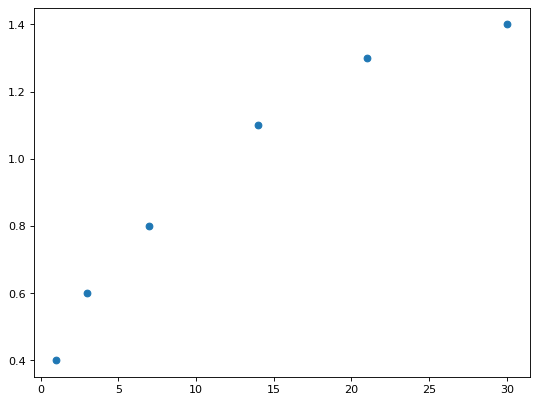

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['income($)'], label="Original Data" )

In [ ]:
def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

In [ ]:
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

In [ ]:
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df['day'], df['income($)'])

In [ ]:
exp_popt, exp_pcov = curve_fit(exp_func, df['day'], df['income($)'])

In [ ]:
projection_endpoint = 90

In [ ]:
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

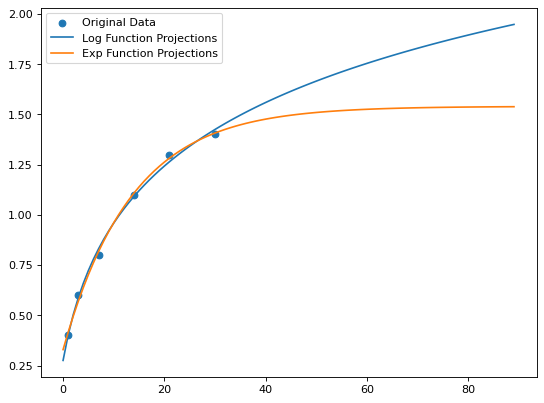

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['income($)'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [ ]:
print('Прогноз среднего дохода с одного пользователя на 90-й день по log модели', round(log_y_projected[89],0))
print('Прогноз среднего дохода с одного пользователя на 90-й день по exp модели', round(exp_y_projected[89],0))

Прогноз среднего дохода с одного пользователя на 90-й день по log модели 2.0
Прогноз среднего дохода с одного пользователя на 90-й день по exp модели 2.0


In [ ]:
y_log_pred = [log_y_projected[ i ] for i in list(df['day'])]
y_log_pred

[0.40124030788520265,
 0.5868265922309144,
 0.8306563452037643,
 1.0918230784760043,
 1.2643750867065862,
 1.4250785895188456]

In [ ]:
y_exp_pred = [exp_y_projected[ i ] for i in list(df['day'])]
y_exp_pred

[0.4152644555519349,
 0.5694065241828665,
 0.81720684756981,
 1.108495305483976,
 1.2823787722727733,
 1.4072480949334225]

Вывод: логарифмическая функция показывает более точные результаты при работе с введёнными данными, таким образом, будет правильным решением использовать для проведения прогноза именно её.